# Aufgabe 4: Gauß-Filter
Der vorgestellte Mittelwertfilter bewirkt eine Glättung des Bildes, die zur Rauschunterdrückung verwendet werden kann.
Ein anderer Faltungsoperator mit demselben Zweck ist der Gauß-Filter $\boldsymbol{A}_\text{Gauß} \in \mathbb{R}^{m \times m}$.
Dabei sind die Koeffizienten der Faltungsmaske gegeben durch
\begin{equation}
 \boldsymbol{A}_\text{Gauß}(h,k) = \mathrm{e}^{-\frac{h^2+k^2}{2\sigma^2}}.
\end{equation}

Die Standardabweichung $\sigma$ wird hierbei in Abhängigkeit von der Fenstergröße üblicherweise auf $\sigma = \frac{m}{5}$ gesetzt.

Berechnen Sie für verschiedene Fenstergrößen (z.~B. $m \in\{3, 5, 7\}$) die Koeffizienten des Gaußfilters!
Achten Sie dabei darauf, dass die Summe der Koeffizienten auf $1$ normiert wird, damit bei der Faltung das Bild insgesamt nicht heller oder dunkler wird!
Verwenden Sie die errechneten Gaußfilter als Ersatz für den Mittelwertfilter aus der vorherigen Teilaufgabe und vergleichen Sie die Ergebnisse!

## 0. Pfade, Pakete etc.

In [10]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [11]:
image_filter = '../material/Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier zunächst die Parameter `m` und `sigma` des Filters. Berechnen Sie anschließend die Filtermaske `A_gauss`!

In [12]:
m = 5
sigma = m / 5

A_gauss = [[np.exp(-((h*h + k*k)/(2 * sigma*sigma))) for k in range(-int(m/2), int(m/2) + 1)] for h in range(-int(m/2), int(m/2) + 1)]

In [13]:
print(A_gauss)

[[0.01831563888873418, 0.0820849986238988, 0.1353352832366127, 0.0820849986238988, 0.01831563888873418], [0.0820849986238988, 0.36787944117144233, 0.6065306597126334, 0.36787944117144233, 0.0820849986238988], [0.1353352832366127, 0.6065306597126334, 1.0, 0.6065306597126334, 0.1353352832366127], [0.0820849986238988, 0.36787944117144233, 0.6065306597126334, 0.36787944117144233, 0.0820849986238988], [0.01831563888873418, 0.0820849986238988, 0.1353352832366127, 0.0820849986238988, 0.01831563888873418]]


## 2. Laden des Bildes

In [14]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [15]:
image = np.asarray(image, dtype=np.float32) / 255

## 3. Berechung der Faltung
Setzen Sie hier die Funktion `ex2_convolve` aus der vorherigen Aufgabe ein:

In [16]:
def ex2_convolve(image, filter_mask):
    convolved_image = np.zeros_like(image)
    filter_mask = np.asarray(filter_mask)
    
    padding_size_x = int(np.rint((filter_mask.shape[0] - 1) / 2))
    padding_size_y = int(np.rint((filter_mask.shape[1] - 1) / 2))
    
    padded_image = np.pad(image, ((padding_size_x, padding_size_y), (padding_size_x, padding_size_y)), mode='constant', constant_values=0)
    
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if (i+filter_mask.shape[0] <= padded_image.shape[0] and j+filter_mask.shape[1] <= padded_image.shape[1]):
                area = padded_image[i:i+filter_mask.shape[0], j:j+filter_mask.shape[1]]
                for i_y in range(0, area.shape[1]):
                    for i_x in range(0, area.shape[0]):
                        convolved_image[i, j] += area[i_x, i_y] * filter_mask[i_x, i_y]
    return convolved_image

Nun wird das gefaltete Bild mit Hilfe der Funktion berechnet:

In [17]:
convolved_image = ex2_convolve(image, A_gauss)

## 4. Darstellung
Um die Wirksamkeit des Gauß-Filters zu überprüfen, stellen Sie `image` und `convolved_image` nebeneinander dar:

<IPython.core.display.Javascript object>


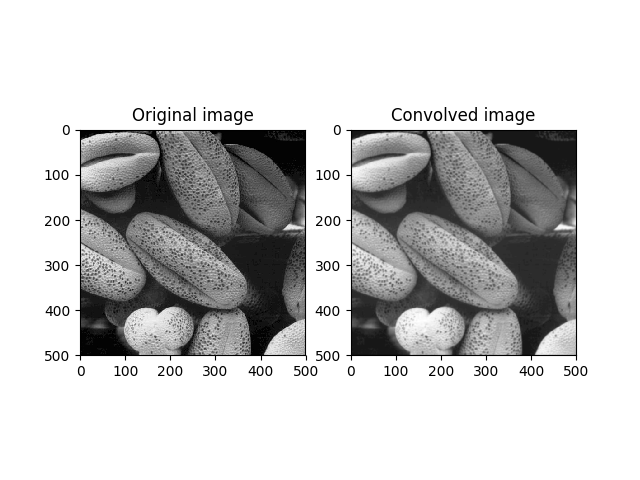

Text(0.5, 1.0, 'Convolved image')

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original image')

axs[1].imshow(convolved_image, cmap='gray')
axs[1].set_title('Convolved image')